In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
import model
import train

In [110]:
# and handle in {'Kirillov_Alexey', 'Mad_Andrei'}

In [209]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 15}

In [210]:
common_problems = ['935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '937:A [Olympiad].py',
 '938:A [Word Correction].py',
 '938:B [Run For Your Prize].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py']


common_problems = ['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py',
 '946:C [String Transformation].py',
 '934:B [A Prosperous Lot].py',
 '939:A [Love Triangle].py',
 '934:A [A Compatible Pair].py',
 '940:B [Our Tanya is Crying Out Loud].py']

In [214]:
train_size = 10
train_problems = common_problems[:train_size]
test_problems = common_problems[train_size:]

In [215]:
train_problems

['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py']

In [216]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
        if problem in common_problems:
            current[problem] = solution
    
    data[handle] = current

In [217]:
data.keys()

dict_keys(['Mad_Andrei', 'nkorobkov', 'Kirillov_Alexey', 'KPACAB4UK', 'Orion', '_Alex_', 'mtarunsai1999', 'DASmirnov', 'denny_sem'])

In [218]:
# code = """
# x = 10
# y = 12
# x += y
# """

# parsed = ast.parse(code)

In [219]:
# for node in ast.walk(parsed):
#     print(node)

In [220]:
# cls.ast_encoder(parsed)

In [230]:
batch_sampler = train.NameBatcher(data,64, train_problems, test_problems)

In [231]:
# batch_sampler.x[0] = "x"

In [232]:
# batch_sampler.x[1] = "x += 11"

In [224]:
cls = model.Model(batch_sampler.get_n_classes())

In [225]:
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.1, momentum=0.9))

In [226]:
# print(batch_sampler.x[0])

In [227]:
# print(batch_sampler.x[1])

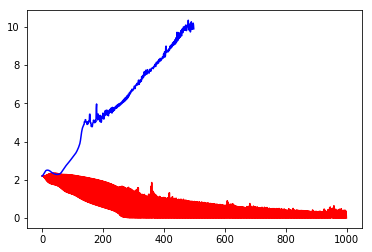

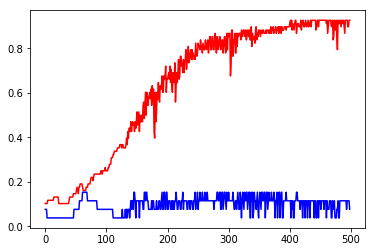

0.0012398438
0.9264705882352942
0.11538461538461539


In [229]:
trainer.train(batch_sampler, {"n_epochs":100})

In [93]:
batch_sampler.get_n_classes()

2

In [94]:
for i in cls.state_dict():
    print(i)

ast_encoder.subtree_network.weight_ih
ast_encoder.subtree_network.weight_hh
ast_encoder.subtree_network.bias_ih
ast_encoder.subtree_network.bias_hh
ast_encoder.embedding_network.0.weight
ast_encoder.embedding_network.0.bias
ast_encoder.embedding_network.2.weight
ast_encoder.embedding_network.2.bias
ast_encoder.embedding_layer.weight
softmax_head.0.weight
softmax_head.0.bias
softmax_head.2.weight
softmax_head.2.bias
